In [58]:
%matplotlib notebook

In [59]:
import numpy as np
from matplotlib import pyplot
import astropy.constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [60]:
class Particle(object):
    def __init__(self, initial_position, initial_velocity, mass, number_time_steps):
        self.position = np.zeros((number_time_steps, 3))
        self.position[0] = initial_position
        self.velocity =  np.zeros((number_time_steps, 3))
        self.velocity[0] = initial_velocity
        self.acceleration = np.zeros((number_time_steps, 3))
        self.mass = mass
        self.pvec = np.zeros((number_time_steps, 3))
        self.pvec[0] = mass * np.cross(initial_position, initial_velocity)
        self.pmag = np.zeros((number_time_steps, 1))
        self.pmag[0] = magnitude(mass * np.cross(initial_position, initial_velocity))
        self.emag = np.zeros((number_time_steps, 1))
        
    def update_position(self, t):
        self.position[t] = self.position[t - 1]
        self.position[t] += self.velocity[t - 1] * delta_t
        self.position[t] += 0.5 * self.acceleration[t - 1] * delta_t * delta_t
    
    def update_velocity(self, t):
        self.velocity[t] = self.velocity[t - 1]
        self.velocity[t] += 0.5 * delta_t * (self.acceleration[t] + self.acceleration[t - 1])
    
    def update_acceleration(self, t, particles):
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.acceleration[t] += G * np.asarray(particle.mass) * r12 / magnitude(r12) ** 3.0
        
    def vector_to(self, position1, t):
        return self.position[t] - position1[t]
    
    def p_vector(self, t):
        self.pvec[t] = self.mass * np.cross(self.position[t], self.velocity[t])
        
    def p_magnitude(self, t):
        self.pmag[t] = magnitude(self.pvec[t])
        
    def e_magnitude(self, t, particles):
        #self.emag[t] = 0.5 * self.mass * np.dot(self.velocity[t], self.velocity[t]) - self.mass * magnitude(r12) ** 2.0 * self.acceleration[t]
        for particle in particles:
            if particle != self:
                r12 = particle.vector_to(self.position, t)
                self.emag[t] = 0.5 * self.mass * np.dot(self.velocity[t], self.velocity[t]) -G * self.mass * np.asarray(particle.mass) / magnitude(r12)

In [61]:
def magnitude(vector):
    return np.sqrt(vector[0] ** 2.0 + vector[1] ** 2.0 + vector[2] ** 2.0)

Distances in Au, Speeds in Au/day, Times in days

In [62]:
number_of_time_steps =10000
delta_t = 1.0
G = astropy.constants.G.to('AU**3 / (day**2 * earthMass)').value

In [89]:
#define particles
particle1 = Particle([0.0, 0.0, 0.0], [0.0, 0.0, 0.0], 10, number_of_time_steps)
particle2 = Particle([1.0, 0.0, 0.0], [0.0, 0.0, 0.0], 1, number_of_time_steps)

In [90]:
particles = [particle1, particle2]

In [91]:
for particle in particles:
    particle.update_acceleration(0, particles)
    particle.e_magnitude(0, particles)

In [92]:
for t in np.arange(1, number_of_time_steps):
    for particle in particles:
        particle.update_position(t)
    for particle in particles:
        particle.update_acceleration(t, particles)
    for particle in particles:
        particle.update_velocity(t)
    for particle in particles:
        particle.p_vector(t)
    for particle in particles:
        particle.p_magnitude(t)
    for particle in particles:
        particle.e_magnitude(t, particles)

<IPython.core.display.Javascript object>


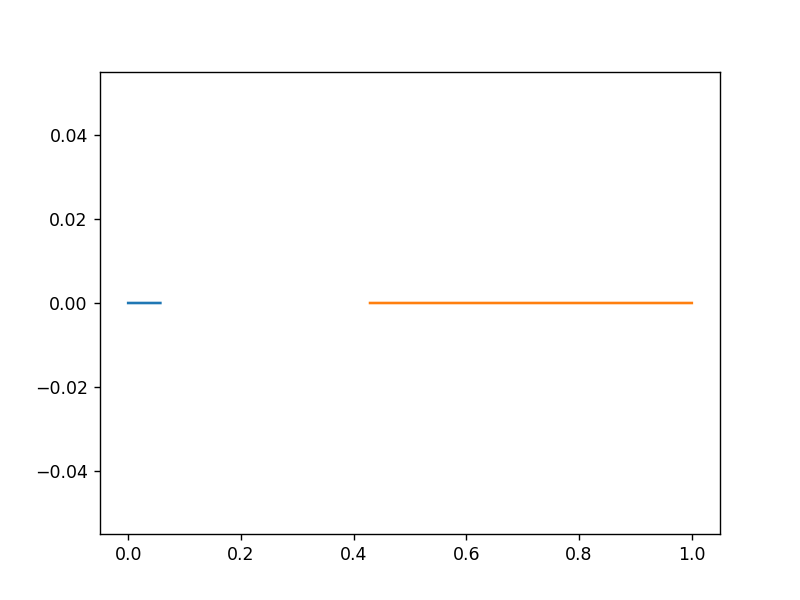

In [93]:
pyplot.plot(particle1.position[:, 0], particle1.position[:, 1])
pyplot.plot(particle2.position[:, 0], particle2.position[:, 1])